In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

complete_csv = "cleanData/CleanFullDataSet.csv"
compl_df = pd.read_csv(complete_csv, low_memory=False)



In [2]:
compl_df.head()

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,recruiterRelationOther,recruiterRelationUnknown,Citizenship Region,Citizenship Sub-Region,Citizenship Intermediate Region,Citizenship Country,Exploit Region,Exploit Sub-Region,Exploit Intermediate Region,Exploit Country
0,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,0,0,...,0,1,Americas,Latin America and the Caribbean,South America,Colombia,unknown,unknown,unknown,unknown
1,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,0,0,...,0,1,Americas,Latin America and the Caribbean,South America,Colombia,unknown,unknown,unknown,unknown
2,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,0,0,...,0,1,Americas,Latin America and the Caribbean,South America,Colombia,unknown,unknown,unknown,unknown
3,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,0,0,...,0,1,Americas,Latin America and the Caribbean,South America,Colombia,unknown,unknown,unknown,unknown
4,2002,Case Management,Female,18--20,Adult,unknown,unknown,CO,0,0,...,0,1,Americas,Latin America and the Caribbean,South America,Colombia,unknown,unknown,unknown,unknown


In [3]:
country_data = compl_df.loc[:,['gender', 'ageBroad','Exploit Country','Citizenship Country','isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval',
       'isSlaveryAndPractices', 'typeOfExploitConcatenated',
       'typeOfLabourAgriculture', 'typeOfLabourAquafarming',
       'typeOfLabourBegging', 'typeOfLabourConstruction',
       'typeOfLabourDomesticWork', 'typeOfLabourHospitality',
       'typeOfLabourIllicitActivities', 'typeOfLabourManufacturing',
       'typeOfLabourMiningOrDrilling', 'typeOfLabourPeddling',
       'typeOfLabourTransportation', 'typeOfLabourOther',
       'typeOfLabourNotSpecified','typeOfSexProstitution', 'typeOfSexPornography',
       'typeOfSexRemoteInteractiveServices', 'typeOfSexPrivateSexualServices' ]]

In [4]:
country_data = country_data.groupby(["Citizenship Country"]).head()

In [5]:
sum_all = country_data[['isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval',
       'isSlaveryAndPractices',
       'typeOfLabourAgriculture', 'typeOfLabourAquafarming',
       'typeOfLabourBegging', 'typeOfLabourConstruction',
       'typeOfLabourDomesticWork', 'typeOfLabourHospitality',
       'typeOfLabourIllicitActivities', 'typeOfLabourManufacturing',
       'typeOfLabourMiningOrDrilling', 'typeOfLabourPeddling',
       'typeOfLabourTransportation', 'typeOfLabourOther',
       'typeOfLabourNotSpecified','typeOfSexProstitution', 'typeOfSexPornography',
       'typeOfSexRemoteInteractiveServices', 'typeOfSexPrivateSexualServices']].sum()

In [6]:
country_cases = pd.DataFrame({"Cases": sum_all})
country_cases

,Cases
isForcedLabour,70
isSexualExploit,60
isOtherExploit,20
isSexAndLabour,5
isForcedMarriage,0
isForcedMilitary,0
isOrganRemoval,0
isSlaveryAndPractices,0
typeOfLabourAgriculture,5
typeOfLabourAquafarming,0


In [7]:
# %matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
# import pycountry


#data file to work with
file = '../cleanData/CleanFullDataSet.csv'

#read data file
clean_data = pd.read_csv(file, low_memory = False)

In [8]:
start_df = clean_data.loc[:,['Citizenship Country','gender', 'ageBroad',  'Citizenship Region', 'Citizenship Intermediate Region', 'Citizenship Sub-Region', "Exploit Country"]]


In [9]:
start_df.head()

,Citizenship Country,gender,ageBroad,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region,Exploit Country
0,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
1,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
2,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
3,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
4,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown


In [10]:
# start_df = start_df.groupby(["Citizenship Country","Exploit Country"])


In [11]:
start_df = start_df.groupby("Exploit Country")

In [12]:
start_df.head()

,Citizenship Country,gender,ageBroad,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region,Exploit Country
0,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
1,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
2,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
3,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
4,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
...,...,...,...,...,...,...,...
43555,Myanmar,Female,9--17,Asia,NaN,South-eastern Asia,Bangladesh
43556,Myanmar,Female,9--17,Asia,NaN,South-eastern Asia,Bangladesh
43557,Myanmar,Female,9--17,Asia,NaN,South-eastern Asia,Bangladesh
43558,Myanmar,Female,9--17,Asia,NaN,South-eastern Asia,Bangladesh


In [13]:
citizen_count = start_df["Citizenship Country"].value_counts()
exploit_count = start_df["Exploit Country"].value_counts()

In [14]:
citizen_count

Exploit Country  Citizenship Country             
Afghanistan      Afghanistan                          83
Albania          Albania                              22
Argentina        Bolivia (Plurinational State of)     18
Austria          Ukraine                              24
Bahrain          Indonesia                            22
                                                    ... 
unknown          unknown                             150
                 Indonesia                           141
                 Colombia                            111
                 Romania                              39
                 Ukraine                              11
Name: Citizenship Country, Length: 112, dtype: int64

In [15]:
exploit_count

Exploit Country           Exploit Country         
Afghanistan               Afghanistan                    83
Albania                   Albania                        22
Argentina                 Argentina                      18
Austria                   Austria                        24
Bahrain                   Bahrain                        22
Bangladesh                Bangladesh                     26
Belarus                   Belarus                       400
Bosnia and Herzegovina    Bosnia and Herzegovina        127
Bulgaria                  Bulgaria                      356
Cambodia                  Cambodia                     1000
China                     China                          79
Cyprus                    Cyprus                         11
Czechia                   Czechia                        38
Denmark                   Denmark                        17
Ecuador                   Ecuador                        13
Egypt                     Egypt                  

In [16]:
citizen_count

Exploit Country  Citizenship Country             
Afghanistan      Afghanistan                          83
Albania          Albania                              22
Argentina        Bolivia (Plurinational State of)     18
Austria          Ukraine                              24
Bahrain          Indonesia                            22
                                                    ... 
unknown          unknown                             150
                 Indonesia                           141
                 Colombia                            111
                 Romania                              39
                 Ukraine                              11
Name: Citizenship Country, Length: 112, dtype: int64

In [17]:
new_df = pd.DataFrame({"Citizenship": citizen_count, "Total of Exploitation": exploit_count})
new_df= new_df.reset_index()
# new_df= new_df.drop(columns=["level_0"])
# new_df = new_df.rename(columns={"level_1": "Citizenship Country","level_2": "Exploit Country" })
# new_df = new_df.dropna(how="any")
new_df

,level_0,level_1,Citizenship,Total of Exploitation
0,Afghanistan,Afghanistan,83.0,83.0
1,Albania,Albania,22.0,22.0
2,Argentina,Argentina,NaN,18.0
3,Argentina,Bolivia (Plurinational State of),18.0,NaN
4,Austria,Austria,NaN,24.0
...,...,...,...,...
142,unknown,Philippines,8671.0,NaN
143,unknown,Republic of Moldova,682.0,NaN
144,unknown,Romania,39.0,NaN
145,unknown,Ukraine,11.0,NaN


In [18]:
new_df = new_df.sort_values(by=["Citizenship"], ascending =False)
new_df = new_df.reset_index()
new_df 

,index,level_0,level_1,Citizenship,Total of Exploitation
0,136,United States of America,unknown,8822.0,NaN
1,142,unknown,Philippines,8671.0,NaN
2,125,Ukraine,Ukraine,5299.0,5399.0
3,79,Republic of Moldova,Republic of Moldova,4504.0,4504.0
4,135,United States of America,United States of America,3636.0,12512.0
...,...,...,...,...,...
142,109,Syrian Arab Republic,Syrian Arab Republic,NaN,41.0
143,114,Thailand,Thailand,NaN,391.0
144,117,Trinidad and Tobago,Trinidad and Tobago,NaN,85.0
145,119,Turkey,Turkey,NaN,197.0


In [19]:
# new_df = new_df.loc[new_df["Exploit Country"] == "United States of America"]
# new_df

In [20]:
#exploited country based on Citizenship
start_df.head()

,Citizenship Country,gender,ageBroad,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region,Exploit Country
0,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
1,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
2,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
3,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
4,Colombia,Female,18--20,Americas,South America,Latin America and the Caribbean,unknown
...,...,...,...,...,...,...,...
43555,Myanmar,Female,9--17,Asia,NaN,South-eastern Asia,Bangladesh
43556,Myanmar,Female,9--17,Asia,NaN,South-eastern Asia,Bangladesh
43557,Myanmar,Female,9--17,Asia,NaN,South-eastern Asia,Bangladesh
43558,Myanmar,Female,9--17,Asia,NaN,South-eastern Asia,Bangladesh


In [21]:
compare_df = clean_data.loc[:,['Citizenship Country','gender', 'ageBroad', "Exploit Country"]]
compare_df = compare_df.groupby("Citizenship Country")

In [22]:
compare_df.count()

,gender,ageBroad,Exploit Country
Citizenship Country,,,
Afghanistan,97,97,97
Albania,22,22,22
Bangladesh,11,11,11
Belarus,1463,1463,1239
Bolivia (Plurinational State of),18,18,18
Bulgaria,342,342,342
Burkina Faso,33,33,33
Cambodia,1979,1979,1979
China,23,23,23


In [23]:

exploited_count = compare_df["Exploit Country"].value_counts()


In [24]:
#so what's happening is that when i group itby citizenship and then due a value count per exploited country
#its kind of creating a nested group with in which is why when creating a data, it displays like this 

test_df = pd.DataFrame({"Exploited Size": exploited_count})
test_df = test_df.reset_index()
test_df


,Citizenship Country,Exploit Country,Exploited Size
0,Afghanistan,Afghanistan,83
1,Afghanistan,Saudi Arabia,14
2,Albania,Albania,22
3,Bangladesh,Tajikistan,11
4,Belarus,Russian Federation,751
...,...,...,...
107,unknown,unknown,150
108,unknown,Cambodia,71
109,unknown,India,46
110,unknown,Ukraine,36


In [25]:
compare_df2 = clean_data.loc[:,['Citizenship Country','gender', 'ageBroad', "Exploit Country", "Citizenship Intermediate Region"]]

In [26]:
compare_df2 = compare_df2['Citizenship Country'].value_counts()

In [175]:
test_2 = clean_data.loc[:,['Citizenship Country','gender', 'ageBroad', "Exploit Country", "Citizenship Intermediate Region"]]
test_2 

,Citizenship Country,gender,ageBroad,Exploit Country,Citizenship Intermediate Region
0,Colombia,Female,18--20,unknown,South America
1,Colombia,Female,18--20,unknown,South America
2,Colombia,Female,18--20,unknown,South America
3,Colombia,Female,18--20,unknown,South America
4,Colombia,Female,18--20,unknown,South America
...,...,...,...,...,...
48768,United States of America,Male,9--17,United States of America,NaN
48769,United States of America,Male,9--17,United States of America,NaN
48770,United States of America,Male,9--17,United States of America,NaN
48771,United States of America,Male,9--17,United States of America,NaN


In [176]:
unknown = test_2[test_2["Citizenship Country"] == "unknown"].index
test_2.drop(unknown, inplace=True)

In [177]:

unknownexploit = test_2[test_2["Exploit Country"] == "unknown"].index
test_2.drop(unknownexploit, inplace=True)

In [179]:
test_2["Citizenship Country"].value_counts()

Ukraine                             7750
Republic of Moldova                 5219
United States of America            3636
Philippines                         2694
Indonesia                           1830
Cambodia                            1609
Belarus                             1463
Myanmar                             1250
Romania                              616
Ghana                                544
Kyrgyzstan                           437
Bulgaria                             342
Haiti                                339
Uzbekistan                           261
Viet Nam                             170
Guinea-Bissau                        145
Lao People's Democratic Republic     126
Nigeria                              108
Afghanistan                           97
Madagascar                            94
Sri Lanka                             85
Sierra Leone                          81
Senegal                               70
Uganda                                70
Thailand        

In [180]:
compare_df2 = test_2["Citizenship Country"].value_counts()

In [181]:
citizenship_df = pd.DataFrame({"Citzenship Size": compare_df2})
citizenship_df = citizenship_df.reset_index()
citizenship_df = citizenship_df.rename(columns={"index" : "Citizenship Country"})
citizenship_df

,Citizenship Country,Citzenship Size
0,Ukraine,7750
1,Republic of Moldova,5219
2,United States of America,3636
3,Philippines,2694
4,Indonesia,1830
5,Cambodia,1609
6,Belarus,1463
7,Myanmar,1250
8,Romania,616
9,Ghana,544


In [182]:
trafficked_country = pd.merge(citizenship_df, test_df, on = "Citizenship Country")

In [183]:
trafficked_country

,Citizenship Country,Citzenship Size,Exploit Country,Exploited Size
0,Ukraine,7750,Ukraine,5299
1,Ukraine,7750,Russian Federation,1676
2,Ukraine,7750,Poland,314
3,Ukraine,7750,Turkey,174
4,Ukraine,7750,United Arab Emirates,100
...,...,...,...,...
101,Colombia,13,unknown,111
102,Colombia,13,Ecuador,13
103,Eritrea,13,Egypt,13
104,Republic of Korea,12,United States of America,12


In [184]:
subregion = compl_df.loc[:,['Citizenship Country', 'Citizenship Intermediate Region', "Citizenship Sub-Region"]]
subregion

,Citizenship Country,Citizenship Intermediate Region,Citizenship Sub-Region
0,Colombia,South America,Latin America and the Caribbean
1,Colombia,South America,Latin America and the Caribbean
2,Colombia,South America,Latin America and the Caribbean
3,Colombia,South America,Latin America and the Caribbean
4,Colombia,South America,Latin America and the Caribbean
...,...,...,...
48768,United States of America,NaN,Northern America
48769,United States of America,NaN,Northern America
48770,United States of America,NaN,Northern America
48771,United States of America,NaN,Northern America


In [185]:
trafficked_country = pd.merge(trafficked_country, subregion, on = "Citizenship Country")

In [186]:
trafficked_country= trafficked_country.sort_values(by=["Exploited Size"], ascending =False)
trafficked_country

,Citizenship Country,Citzenship Size,Exploit Country,Exploited Size,Citizenship Intermediate Region,Citizenship Sub-Region
144511,Philippines,2694,unknown,8671,NaN,South-eastern Asia
141580,Philippines,2694,unknown,8671,NaN,South-eastern Asia
141604,Philippines,2694,unknown,8671,NaN,South-eastern Asia
141605,Philippines,2694,unknown,8671,NaN,South-eastern Asia
141606,Philippines,2694,unknown,8671,NaN,South-eastern Asia
...,...,...,...,...,...,...
94848,Ukraine,7750,unknown,11,NaN,Eastern Europe
94849,Ukraine,7750,unknown,11,NaN,Eastern Europe
94850,Ukraine,7750,unknown,11,NaN,Eastern Europe
94851,Ukraine,7750,unknown,11,NaN,Eastern Europe


In [187]:
unknown = trafficked_country[trafficked_country["Citizenship Country"] == "unknown"].index
trafficked_country.drop(unknown, inplace=True)

In [188]:
unknownexploit = trafficked_country[trafficked_country["Exploit Country"] == "unknown"].index
trafficked_country.drop(unknownexploit, inplace=True)

In [189]:
# trafficked_country.drop(unknown, inplace=True)
# trafficked_country.drop(unknownexploit, inplace=True)

In [190]:
# trafficked_country= trafficked_country.drop(unknownexploit, inplace=True)

trafficked_country

,Citizenship Country,Citzenship Size,Exploit Country,Exploited Size,Citizenship Intermediate Region,Citizenship Sub-Region
0,Ukraine,7750,Ukraine,5299,NaN,Eastern Europe
4796,Ukraine,7750,Ukraine,5299,NaN,Eastern Europe
3198,Ukraine,7750,Ukraine,5299,NaN,Eastern Europe
3200,Ukraine,7750,Ukraine,5299,NaN,Eastern Europe
3201,Ukraine,7750,Ukraine,5299,NaN,Eastern Europe
...,...,...,...,...,...,...
293679,Belarus,1463,Cyprus,11,NaN,Eastern Europe
293678,Belarus,1463,Cyprus,11,NaN,Eastern Europe
293677,Belarus,1463,Cyprus,11,NaN,Eastern Europe
294473,Belarus,1463,Cyprus,11,NaN,Eastern Europe


In [191]:
top_5 = trafficked_country.loc[:,["Citizenship Country","Citzenship Size"]]

In [192]:
top_5 = top_5.drop_duplicates()
top_5 = top_5.sort_values(by="Citzenship Size", ascending=False)
top_5= top_5.reset_index(drop=True)
top_5.head()


,Citizenship Country,Citzenship Size
0,Ukraine,7750
1,Republic of Moldova,5219
2,United States of America,3636
3,Philippines,2694
4,Indonesia,1830


In [193]:
five_countries= list(top_5["Citizenship Country"].head())
five_country_size = list(top_5["Citzenship Size"].head())
five_countries

['Ukraine',
 'Republic of Moldova',
 'United States of America',
 'Philippines',
 'Indonesia']

In [197]:
t_5_e = trafficked_country.loc[trafficked_country["Citizenship Country"].isin(five_countries), :]
t_5_e = t_5_e.drop_duplicates()
t_5_e = t_5_e.sort_values(by=["Citzenship Size","Exploited Size"], ascending=False)
t_5_e = t_5_e.reset_index(drop=True)
t_5_e

,Citizenship Country,Citzenship Size,Exploit Country,Exploited Size,Citizenship Intermediate Region,Citizenship Sub-Region
0,Ukraine,7750,Ukraine,5299,NaN,Eastern Europe
1,Ukraine,7750,Russian Federation,1676,NaN,Eastern Europe
2,Ukraine,7750,Poland,314,NaN,Eastern Europe
3,Ukraine,7750,Turkey,174,NaN,Eastern Europe
4,Ukraine,7750,United Arab Emirates,100,NaN,Eastern Europe
5,Ukraine,7750,North Macedonia,54,NaN,Eastern Europe
6,Ukraine,7750,Czechia,38,NaN,Eastern Europe
7,Ukraine,7750,Serbia,27,NaN,Eastern Europe
8,Ukraine,7750,Austria,24,NaN,Eastern Europe
9,Ukraine,7750,Kazakhstan,17,NaN,Eastern Europe


In [205]:
test3 = t_5_e.groupby("Citizenship Country")
test3["Exploited Size"].sum()

Citizenship Country
Indonesia                   1797
Philippines                 2694
Republic of Moldova         4750
Ukraine                     7750
United States of America    3636
Name: Exploited Size, dtype: int64

In [200]:
exploit_country = list(t_5_e["Exploit Country"])
exploit_country_size = list(t_5_e["Exploited Size"])


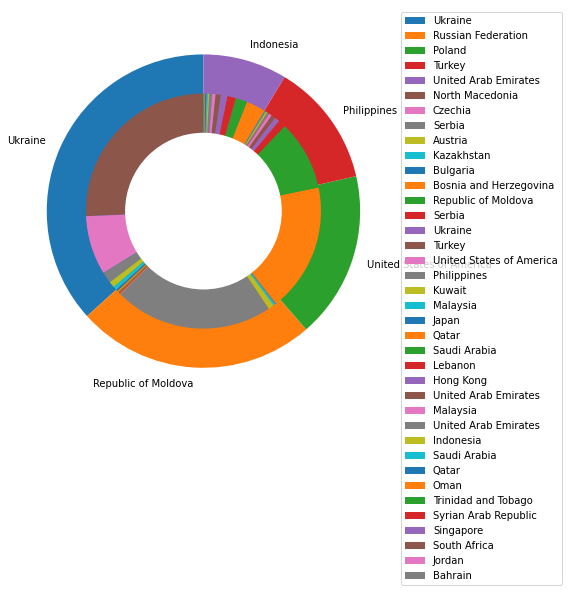

In [203]:
plt.figure(figsize=(8, 8))

#Data to plot
labels = five_countries
sizes = five_country_size
sub_labels = exploit_country
sub_sizes = exploit_country_size

# explode = (0.02,0.02,0.02,0.02,0.02,)
# explode_expl = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
#                0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,)
 
bigger = plt.pie(sizes,startangle=90,labels=labels, frame=True)
smaller = plt.pie(sub_sizes,radius=0.75, startangle=90)
centre_circle = plt.Circle((0, 0), 0.5, color='black',fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels=sub_labels,bbox_to_anchor=(1.05, 1))


        
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
labeldistance=0.7)